# Install Modules

In [1]:
%pip install opencv-python
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install tensorflow
%pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

# Importing Modules

In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline


import tensorflow as tf  # importing nueral networks
from keras.preprocessing.image import load_img  # This will directly load all the images in the numpy array

from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

## Age : Regression problem
## Gender : Classification problem
### we will use different kinf of models because we have to solve two different problems(Regression, Classification) using the same model in our project.

## Load the dataset

In [31]:
BASE_DIR = "/home/ayush/Downloads/UTKFace/"

In [32]:
# labels : age, gender

image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

### Convert to Data Frame

In [33]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/home/ayush/Downloads/UTKFace/32_0_3_201701192...,32,0
1,/home/ayush/Downloads/UTKFace/5_1_1_2016121919...,5,1
2,/home/ayush/Downloads/UTKFace/31_0_1_201701171...,31,0
3,/home/ayush/Downloads/UTKFace/27_1_4_201701161...,27,1
4,/home/ayush/Downloads/UTKFace/65_0_1_201701171...,65,0


In [34]:
# map labels for gender

gender_dict = {0:'Male', 1:'Female'}

## Exploratory Data Analysis


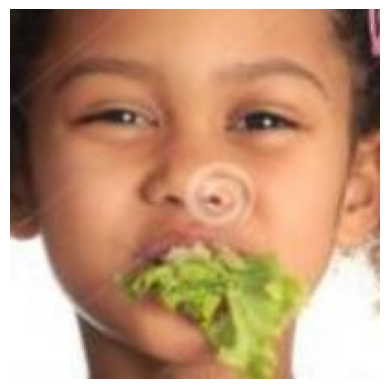

In [35]:
from PIL import Image
img = Image.open(df['image'][1])
plt.axis('off')
plt.imshow(img); # This semi-colon is added to remove the object address from output screen.

<Axes: xlabel='age', ylabel='Density'>

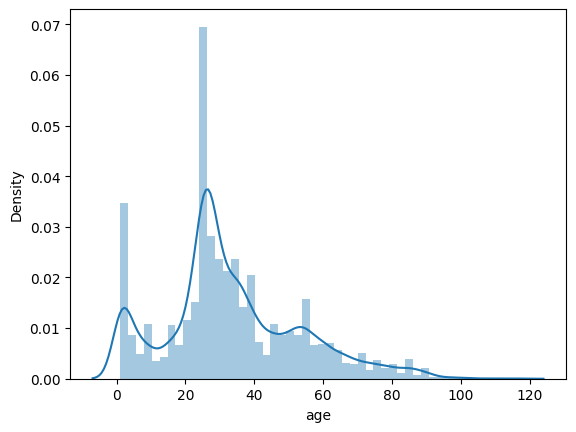

In [36]:
sns.distplot(df['age'])

Text(0.5, 1.0, 'Distribution of Gender')

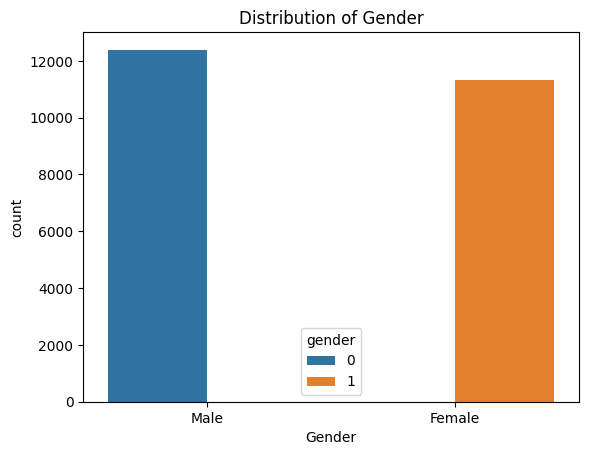

In [49]:
# This line of code is not working it is only showing the total number of images in a form
# of a single column. So i used the updated code below.
# sns.countplot(df['gender'])  


# Read the usage of hue in below code for future reference
# By adding the hue='gender' parameter to sns.countplot, it will separate the bars 
# by gender (0 for Male, 1 for Female) and display them in different colors.

sns.countplot(x='gender', data=df, hue='gender')
plt.xlabel("Gender")
plt.xticks([0, 1], labels=["Male", "Female"])
plt.title("Distribution of Gender")

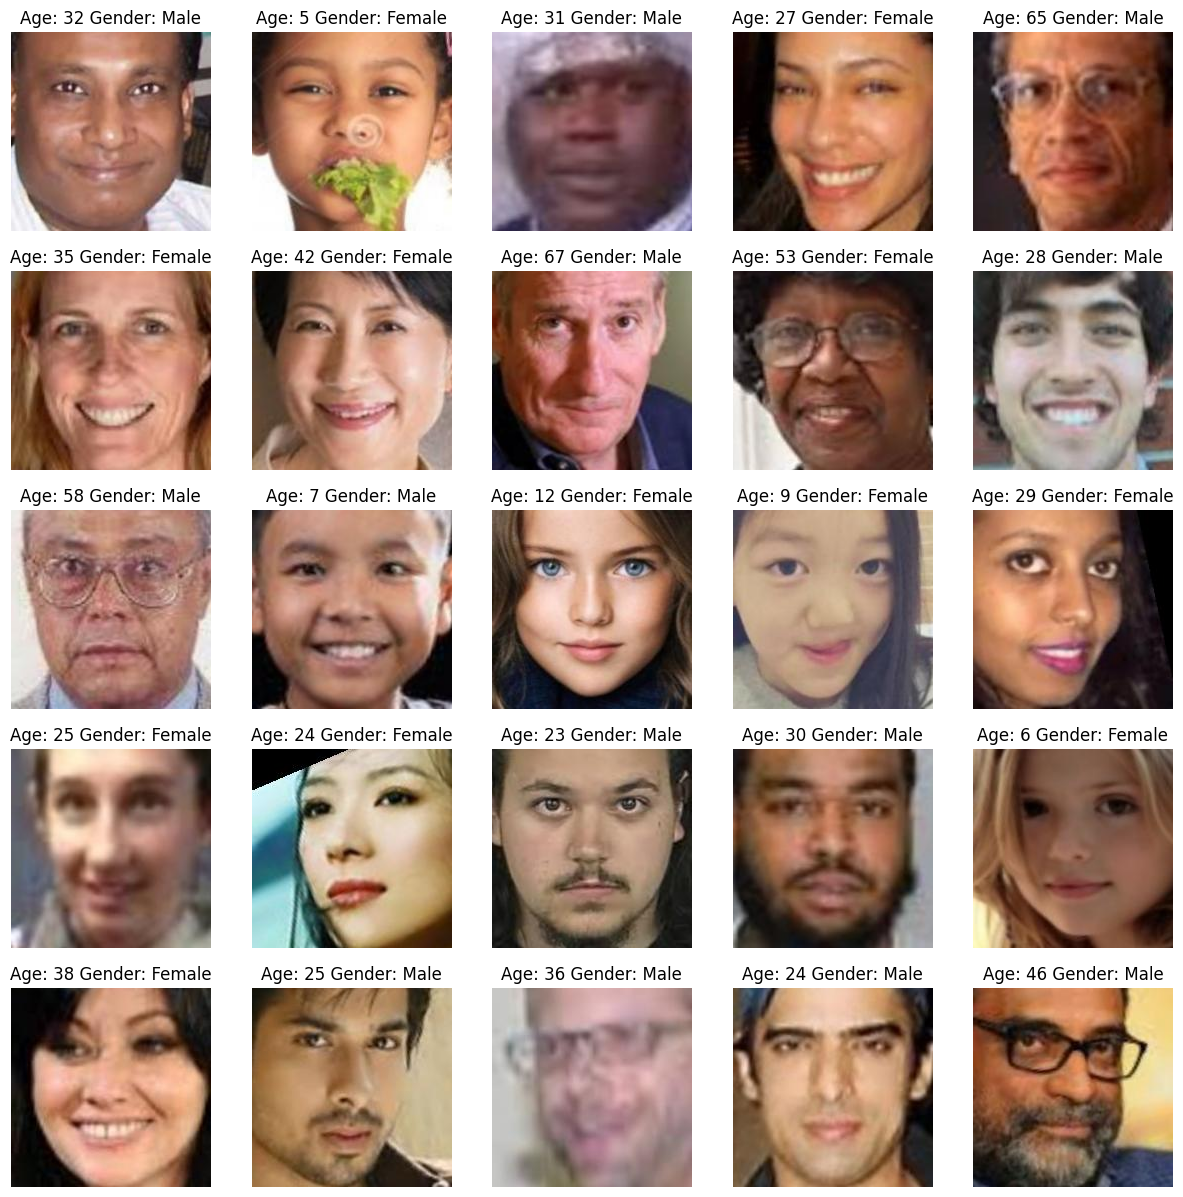

In [51]:
# to display grid of images
plt.figure(figsize=(15, 15))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

## Feature Extraction

In [52]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features